# Predicting The Dataset Using SAHI
## 切片（小图）数据预测

In [10]:
model_path = "/workspace/models/runs_yolov11/output/good/yolo11n-seg.pt---data_split_0.6_0.2_0.2_4---0.913/weights/best.pt"

In [11]:
from sahi import AutoDetectionModel

detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model_path=model_path,
    confidence_threshold=0.3,
    device="cuda:0",  # or 'cuda:0'
)

In [16]:
from sahi.predict import get_prediction
from sahi.utils.cv import read_image

# With an image path
result = get_prediction("/workspace/models/runs_yolov11/data/data_split_0.4_0.3_0.3/test/images/0828_0633_580_jpg.rf.793c961f03bb7c8a3fd3ced3a1d5c601_73_512_512_1152_1152.png", detection_model)

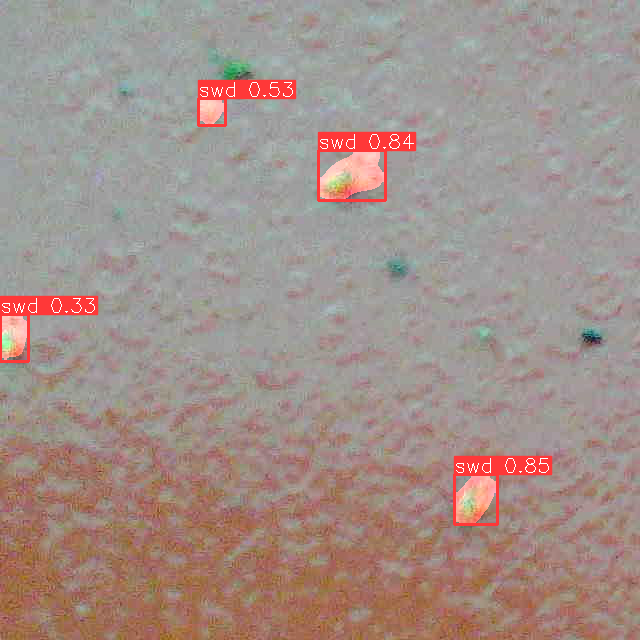

In [ ]:
from PIL import Image as PILImage

result.export_visuals(export_dir="/workspace/models/runs_yolov11/demo_data/")
image = PILImage.open("/workspace/models/runs_yolov11/demo_data/prediction_visual.png")
image = image.resize((640, 640))
image.show()

## 原图（大图）预测

In [1]:
model_path = "/workspace/models/runs_yolov11/output/good/yolo11n-seg.pt---data_split_0.6_0.2_0.2_4---0.913/weights/best.pt"

In [3]:
from sahi import AutoDetectionModel

detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model_path=model_path,
    confidence_threshold=0.8,
    device="cuda:0",  # or 'cuda:0'
)

In [11]:
from sahi.predict import get_sliced_prediction
image_path = "/workspace/models/SAHI/run_v5/ms2_0710-0726_41/0726_0736_640.jpg"
result = get_sliced_prediction(
    image_path,
    detection_model,
    slice_height=640,
    slice_width=640,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing prediction on 63 slices.


In [16]:
import os
import json

# =========================
# 转换成 COCO annotation 格式
# =========================
annotations = []
images = []
output_json = "/workspace/models/runs_yolov11/demo_data2/0711_0931_540_predictions.json"

image_id = os.path.splitext(os.path.basename(image_path))[0]
width = result.image_width
height = result.image_height

# 添加 image 信息
images.append({
    "id": image_id,
    "file_name": os.path.basename(image_path),
    "width": width,
    "height": height,
})

# 添加 detection 结果
for idx, obj in enumerate(result.object_prediction_list):
    # bbox: [x_min, y_min, width, height]
    bbox = obj.bbox.to_xywh()
    annotations.append({
        "id": idx,
        "image_id": image_id,
        "category_id": obj.category.id,
        "category_name": obj.category.name,
        "bbox": [float(b) for b in bbox],
        "score": float(obj.score.value),
        "area": float(bbox[2] * bbox[3]),
        "iscrowd": 0
    })

# 组织成 COCO-like dict
coco_output = {
    "images": images,
    "annotations": annotations,
    "categories": [
        {"id": k, "name": v} for k, v in detection_model.category_mapping.items()
    ]
}

# 保存到 json
with open(output_json, "w", encoding="utf-8") as f:
    json.dump(coco_output, f, indent=2)

print(f"保存完成: {output_json}")

保存完成: /workspace/models/runs_yolov11/demo_data2/0711_0931_540_predictions.json


保存完成: /workspace/models/runs_yolov11/demo_data2/prediction_visual.png


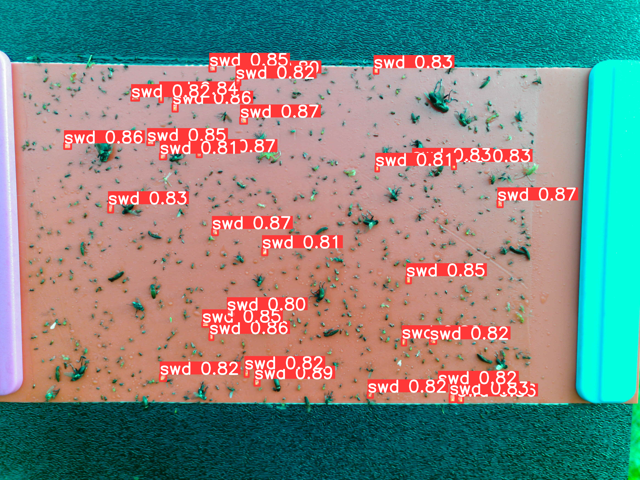

In [19]:
from PIL import Image as PILImage

result.export_visuals(export_dir="/workspace/models/runs_yolov11/demo_data2/")
print("保存完成: /workspace/models/runs_yolov11/demo_data2/prediction_visual.png")
# 压缩图片大小到 640，然后展示
image = PILImage.open("/workspace/models/runs_yolov11/demo_data2/prediction_visual.png")
image = image.resize((640, 480))
image.show()
